495.052
518.949


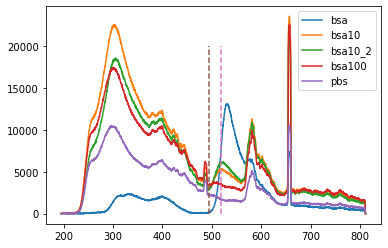

7440.0
2049.0
25.0


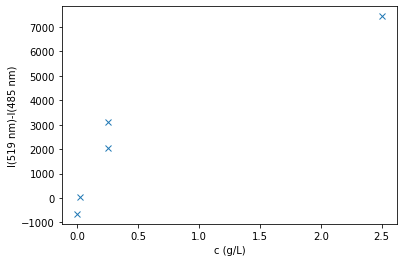

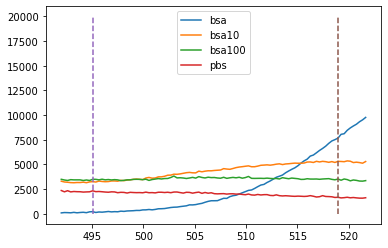

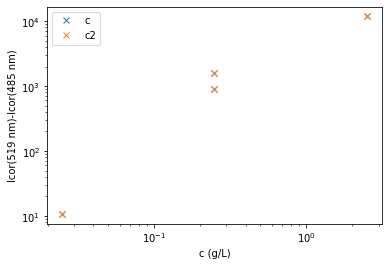

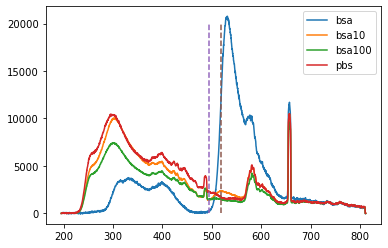

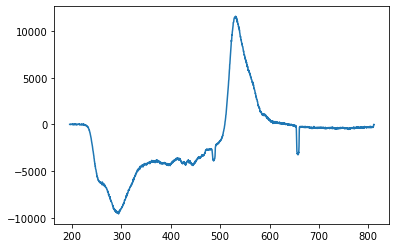

In [82]:
import numpy as np
import matplotlib.pyplot as plt 

filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/both_bsa_1x_500_Subt2_12-14-42-512.txt'
bsa1 = np.genfromtxt(filename, skip_header=15)
filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/both_bsa_10x_500_Subt2_12-10-40-011.txt'
bsa10 = np.genfromtxt(filename, skip_header=15)
filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/both_bsa_100x_500_Subt2_12-05-36-512.txt'
bsa100 = np.genfromtxt(filename, skip_header=15)
filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/both_pbs_500_Subt2_11-58-21-013.txt'
pbs = np.genfromtxt(filename, skip_header=15)
filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/both_bsa10x_500_Subt2_12-11-28-512.txt'
bsa10_2 = np.genfromtxt(filename, skip_header=15)


abs=882 #495 nm pour l'adsorption
emi=961 #519 nm pour l'emission
print (pbs [abs,0])
print (pbs [emi,0])


plt.plot(bsa1 [:,0], bsa1 [:,1], label='bsa')
plt.plot(bsa10 [:,0], bsa10 [:,1], label='bsa10')
plt.plot(bsa10 [:,0], bsa10_2 [:,1], label='bsa10_2')
plt.plot(bsa100 [:,0], bsa100 [:,1], label='bsa100')
plt.plot(pbs [:,0], pbs [:,1], label='pbs')
plt.plot([pbs [abs,0],pbs [abs,0]],[0,20000],'--')
plt.plot([pbs [emi,0],pbs [emi,0]],[0,20000],'--')
plt.legend(loc='best')
plt.show()

c_0=2.5
c=[c_0,c_0/10.,c_0/10.,c_0/100.,0]
d_pbs=pbs [emi,1]-pbs [abs,1]
d_bsa1=bsa1 [emi,1]-bsa1 [abs,1]
d_bsa10=bsa10 [emi,1]-bsa10 [abs,1]
d_bsa10_2=bsa10_2 [emi,1]-bsa10_2 [abs,1]
d_bsa100=bsa100 [emi,1]-bsa100 [abs,1]

delta=[d_bsa1,d_bsa10,d_bsa10_2,d_bsa100, d_pbs]

print (bsa1 [emi,1]-bsa1 [abs,1])
print (bsa10 [emi,1]-bsa10 [abs,1])
print (bsa100 [emi,1]-bsa100 [abs,1])
plt.plot(c,delta,'x')
plt.xlabel('c (g/L)')
plt.ylabel('I(519 nm)-I(485 nm)')
plt.show()

gap=10
plt.plot(bsa1 [abs-gap:emi+gap,0], bsa1 [abs-gap:emi+gap,1], label='bsa')
plt.plot(bsa10 [abs-gap:emi+gap,0], bsa10 [abs-gap:emi+gap,1], label='bsa10')
plt.plot(bsa100 [abs-gap:emi+gap,0], bsa100 [abs-gap:emi+gap,1], label='bsa100')
plt.plot(pbs [abs-gap:emi+gap,0], pbs [abs-gap:emi+gap,1], label='pbs')
plt.plot([pbs [abs,0],pbs [abs,0]],[0,20000],'--')
plt.plot([pbs [emi,0],pbs [emi,0]],[0,20000],'--')
plt.legend(loc='best')
plt.show()

#recalibrage
bcb=1600 #700
bch=2030
cal=np.mean(pbs[bcb:bch,1])
subs=np.zeros(2067)
bsa1_c=np.zeros(2067)
bsa10_c=np.zeros(2067)
bsa10_2_c=np.zeros(2067)
bsa100_c=np.zeros(2067)
c_bsa1=cal/np.mean(bsa1[bcb:bch,1])
c_bsa10=cal/np.mean(bsa10[bcb:bch,1])
c_bsa10_2=cal/np.mean(bsa10_2[bcb:bch,1])
c_bsa100=cal/np.mean(bsa100[bcb:bch,1])      

for i in range (len(pbs [:,0])):
        bsa1_c[i]=bsa1[i,1]*c_bsa1
        bsa10_c[i]=bsa10[i,1]*c_bsa10
        bsa10_2_c[i]=bsa10_2[i,1]*c_bsa10_2
        bsa100_c[i]=bsa100[i,1]*c_bsa100
        subs[i]=bsa1[i,1]-pbs [i,1]             

delta_c=[d_bsa1*c_bsa1,d_bsa10*c_bsa10,d_bsa10_2*c_bsa10_2,d_bsa100*c_bsa100, d_pbs]        

d_bsa1_c=bsa1_c [emi]-bsa1_c [abs]
d_bsa10_c=bsa10_c [emi]-bsa10_c [abs]
d_bsa10_2_c=bsa10_2_c [emi]-bsa10_2_c [abs]
d_bsa100_c=bsa100_c [emi]-bsa100_c [abs]

delta_c2=[d_bsa1_c,d_bsa10_c,d_bsa10_2_c,d_bsa100_c, d_pbs]        


plt.loglog(c,delta_c,'x', label='c')
plt.loglog(c,delta_c2,'x', label='c2')
plt.xlabel('c (g/L)')
plt.ylabel('Icor(519 nm)-Icor(485 nm)')
plt.legend(loc='best')
plt.show()
        
plt.plot(bsa1 [:,0], bsa1_c [:], label='bsa')
plt.plot(bsa10 [:,0], bsa10_c [:], label='bsa10')
plt.plot(bsa100 [:,0], bsa100_c [:], label='bsa100')
plt.plot(pbs [:,0], pbs [:,1], label='pbs')
plt.plot([pbs [abs,0],pbs [abs,0]],[0,20000],'--')
plt.plot([pbs [emi,0],pbs [emi,0]],[0,20000],'--')
plt.legend(loc='best')
plt.show()     
        
plt.plot(pbs [:,0], subs[:], label='bsa')


In [31]:
print (range (len(pbs [:,0])))

range(0, 2067)


In [35]:
print (subs)

2067
